In [1]:
import numpy as np
import scipy.integrate as intg
import scipy.signal as sig
import os
import fnmatch as fm
import re
import scan_functions as sf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [2]:
# importing the with O2 testing data as wox
# importing the without O2 testing data as nox
# data file path is to the two folders that are WITHIN the working directory
wox = dict()
nox = dict()
# the bad guys are the ones that dont have glass/flat on the left
bad_wox = np.array(['s3t4', 's3t5', 's3t6', 's6t1', 's6t2', 's6t3'])
# bad_nox = np.array(['']) dont think there are any, yay me :)
wox = sf.scan_dict(wox,'./al2o3_O2_testing_12-2-19/',bad_bois=bad_wox)
nox = sf.scan_dict(nox,'./al2o3_no-O2_testing_12-19-19/')
# make sure all data is in mircometers
wox = sf.make_x_micro(wox)
nox = sf.make_x_micro(nox)

In [3]:
# wox variables for 'sp_analysis_hard'
# will wanna revisit these after i apply new data adjustments
w_xfa = np.array([.4,.45,.45,.2,.4,
                  .4,.4,.45,.45,
                  .45,.3,.3,.25,.25,.25,
                  .4,.3,.35,.3,.4,
                  .4,.4,.5,.4,.4,.4,
                  .9,.45,.7,
                  .4,.3,.4,.4,.3,
                  .3,.3,.35,.4])
w_xib = np.array([.65,.7,.6,.8,.65,
                  .7,.55,.7,.6,
                 .65,.4,.55,.4,.45,.4,
                 .5,.45,.5,.6,.6,
                 .65,.55,.65,.6,.65,.55,
                 1.1,.6,.9,
                 .5,.45,.55,.6,.55,
                 .5,.45,.6,.65])
# w_xfb = np.array([(w_xib[i]+.4) for i in range(len(w_xib))])
w_xfb = np.array([1.2,.9,.8,1.2,1.,
                 1.,.95,1.4,1.3,
                 1.1,1.,.8,1.,1.,.8,
                 1.,.8,.65,1.1,.75,
                 1.7,.85,.9,.75,1.,1.05,
                 1.4,.9,1.05,
                 .7,.85,1.2,1.15,1.1,
                 .8,.85,.85,1.05])

In [4]:
# nox variables for 'sp_analysis_hard'
# sample: runs, this will help hella
# ^ 1:5, 2:6, 3:6, 4:6, 5:6, 6:6, 7:6, 8:5
# set that needs xia: s2t1
n_xfa = np.array([.55,.4,.4,.55,.65,
                 .45,.35,.4,.45,.45,.4,
                 .3,.35,.4,.4,.4,.4,
                 .5,.3,.3,.4,.4,.35,
                 .3,.3,.35,.45,.45,.4,
                 .35,.3,.3,.35,.4,.4,
                 .45,.35,.4,.3,.4,.3,
                 .4,.4,.4,.3,.3])
n_xib = np.array([.7,.5,.5,.7,.7,
                 .5,.45,.55,.65,.6,.6,
                 .5,.6,.6,.6,.65,.65,
                 .6,.6,.6,.55,.6,.55,
                 .45,.45,.45,.6,.6,.6,
                 .45,.45,.5,.55,.6,.55,
                 .6,.55,.6,.45,.55,.45,
                 .5,.5,.6,.45,.45])
n_xfb = np.array([1.3,1.35,1.35,1.6,1.65,
                 1.35,1.35,1.35,1.7,1.7,1.7,
                 1.35,1.2,1.3,1.8,1.75,1.8,
                 1.75,1.75,1.75,1.4,1.,1.4,
                 1.4,1.4,1.4,1.75,1.7,1.75,
                 1.4,1.4,1.4,1.75,1.75,1.7,
                 1.75,1.75,1.75,1.4,1.4,1.4,
                 1.75,1.75,1.75,1.4,1.4])

In [5]:
# raw data key names
# dont run after changing the dict!
nox_key = np.array([key for key in nox])
wox_key = np.array([key for key in wox])

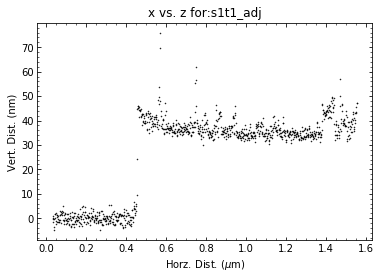

In [10]:
sf.key_plot(wox,'s1t1_adj')
# wox = sf.proj(wox,'s1t1',w_xfa[0])

height of  s1t1_adj  is: 36.1076720465646 +- 3.3959717069350543 nm


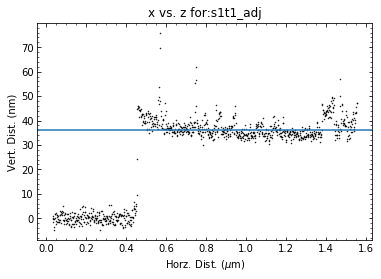

In [16]:
wox = sf.height(wox,'s1t1_adj',w_xfa[0],w_xib[0],w_xfb[0],result=True)

In [ ]:
wox = sf.sp_analysis_hard(wox,8,w_xfa,w_xib,w_xfb)
nox = sf.sp_analysis_hard(nox,8,n_xfa,n_xib,n_xfb)

In [ ]:
avgkey_w = np.array([key for key in wox if (re.search('avg',key))])
avgkey_n = np.array([key for key in nox if (re.search('avg',key))])
wox_avg = np.array([wox[avgkey_w[i]][0] for i in range(len(avgkey))],dtype=float)
wox_std = np.array([wox[avgkey_w[i]][1] for i in range(len(avgkey))],dtype=float)
nox_avg = np.array([nox[avgkey_n[i]][0] for i in range(len(avgkey))],dtype=float)
nox_std = np.array([nox[avgkey_n[i]][1] for i in range(len(avgkey))],dtype=float)
# plt.errorbar()
n = np.arange(1,9)

In [ ]:
plt.figure();
plt.errorbar(n,wox_avg,yerr=wox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITH $O_2$ dep per run from SP');

In [ ]:
plt.figure();
plt.errorbar(n,nox_avg,yerr=nox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.axhline(40.,c='r',ls=':');
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITHOUT $O_2$ dep per run from SP');

In [ ]:
for i in range(len(nox_key[41:])):
    sf.key_plot(nox,nox_key[i+41])

In [ ]:
# CHANGE THE OUTPUT OF 'PROJ' FROM TUPLE TO 2 ARRAYS
# testing rms calc
wox_rms = np.zeros_like(wox_key)
nox_rms = np.zeros_like(nox_key)
for i in range(len(wox_key)):
    wox_rms[i] = np.sqrt(np.sum(wox[wox_key[i]+'_adj'][1]**2)/len(wox[wox_key[i]+'_adj'][1]))
for i in range(len(nox_key)):
    nox_rms[i] = np.sqrt(np.sum(nox[nox_key[i]+'_adj'][1]**2)/len(nox[nox_key[i]+'_adj'][1]))

In [ ]:
wox_rms

In [ ]:
nox_rms

In [ ]:
# rms calculation, try on both raw and proj data
# rms = [(sum(Z(x)^2)/N)]^1/2
def rms(dick,key):
    '''
    calculates the rms of the data, this is the surface roughness
    works with the already established dictionary/sp system
    input:
    z - array, float - a [N,1] array of the vertical heights at each point, N is number of points
    output:
    rms - float - the roughness of the surface
    '''
    if key in dick:
        
    return rms

In [ ]:
def mv_avg():
    '''
    moving average algorithm built around the exsisting sp analysis framework
    takes average of m (m<<tot pnts) consecutive pnts and replaces those po
    '''

In [ ]:
# testing implementation of moving average
# doing filter after proj funct


In [ ]:
range(len(np.array([key for key in wox])))

In [ ]:
range(38)

In [ ]:
np.array([key for key in nox]).shape